
# COMP3411/9418 21T0 Helper Notebook for Assignment 2

- Lecturer: Anna Trofimova
- School of Computer Science and Engineering, UNSW Sydney
- Last Update 22th January at 18:00pm, 2021
$$
% macros
\newcommand{\indep}{\perp \!\!\!\perp}
$$

#### 1. The purpose of this notebook

Assignment 1 showed that many of you were struggling with the coding part, even though we run about 8 hours of programming consultations and 4 hours of help sessions. We have heard you and decided to change the concept for Assignment 2.

This notebook is created to help you with the coding part for Assignment 2. This assignment doesn't aim at testing your coding skills but your understading of the supervised learning concepts. However, we want you to have some coding experience, so you can apply your knowledge outside of UNSW walls in the real world and be a competitive experts in the field.

Good luck!
<div style="text-align: right"> -- Anna </div>

#### 2. Libraries

These are the libraries that you will need to run the code in this helper notebook. Run the cell below to import them.

In [1]:
%matplotlib inline
from sklearn import tree
import pandas as pd
from sklearn.tree import export_graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import graphviz
from graphviz import Source
from matplotlib import pyplot as plt

Some of these libraries are handy with manipulating data - *pandas*; some are used to build classification models - *sklearn*; some of them can be used to visualize your models so you can have a better idea of how they handle the data - *graphviz & matplotlib*.

#### 3. Data
You can import data from a .csv file by running the cell below:

In [2]:
data = pd.read_csv('amazon_alexa.tsv', sep='\t')

If you want preview the dataset you can print the top 5 samples by running the cell below: 

In [3]:
data.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


To check the total number of samples and the number of attributes you can run the following code:

In [5]:
data.shape

(3150, 5)

#### 4. Representation

There are 3150 smaples and 5 attributes in this datset. If we want to perform Sentiment Analysis we need to use only two of them: attribute 'verified_reviews' should be used as input and 'rating' as output.

This is how you can access the values of the samples for each attribute:

In [6]:
y = data['rating']
x = data['verified_reviews']

**The current representation of the input is bad**, so we need to encode each word of the input into numeric form. The code below converts a collection of text samples into a document-term matrix:

In [7]:
vectorizer = CountVectorizer(lowercase = True, 
                             token_pattern = r'[A-Za-z0-9#@$%_]{2,}', 
                             binary = True, 
                             max_features=200)
x_dense = vectorizer.fit_transform(x)
x_sparse = pd.DataFrame.sparse.from_spmatrix(x_dense, columns=vectorizer.get_feature_names())

Run the code below to see the new representation of the input data:

In [8]:
x_sparse.head()

,#34,able,about,after,alarm,alexa,all,also,am,amazing,...,will,wish,with,without,work,working,works,would,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 5. Training

To create a decision tree classifier, run the code below:

In [9]:
classifier = tree.DecisionTreeClassifier()

Now you need to train the model by running the following:

In [10]:
model = classifier.fit(x_sparse, y)

Run the code below to visualize your tree (it might take some time because the resulting tree is quite big).

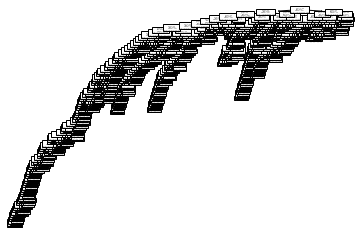

In [15]:
tree.plot_tree(classifier)
plt.show()

If you want to take a closer look, you can save the tree into a file (it also might take a bit of time because it builds the same tree for the second time):

In [14]:
tree_graph = Source(tree.export_graphviz(classifier, out_file=None, feature_names=vectorizer.get_feature_names()))
png_bytes = tree_graph.pipe(format='png')
with open('decision_tree.png','wb') as f:
    f.write(png_bytes)


ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

#### 6. Testing

**You should not test your model on the data used for training**, but we will do it anyway for the demonstration purposes:

In [ ]:
x_test = x_sparse
y_test = y

y_test_predicted = model.predict(x_test)

You can also print different evaluation metrics by running the code below:

In [ ]:
print(classification_report(y_test, y_test_predicted))